/var/folders/vb/dkp59xmd1315k5jlmsvd6k5h0000gn/T/ipykernel_7251/1409170602.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  embeddings = torch.load(embedding_path, map_lo

TCD Embedding - Embeddings shape: torch.Size([1504, 256])
TCD Embedding - Labels shape: (1504,)


/var/folders/vb/dkp59xmd1315k5jlmsvd6k5h0000gn/T/ipykernel_7251/1409170602.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  embeddings = torch.load(embedding_path, map_lo

Contrastive Learning embedding - Embeddings shape: torch.Size([1504, 256])
Contrastive Learning embedding - Labels shape: (1504,)


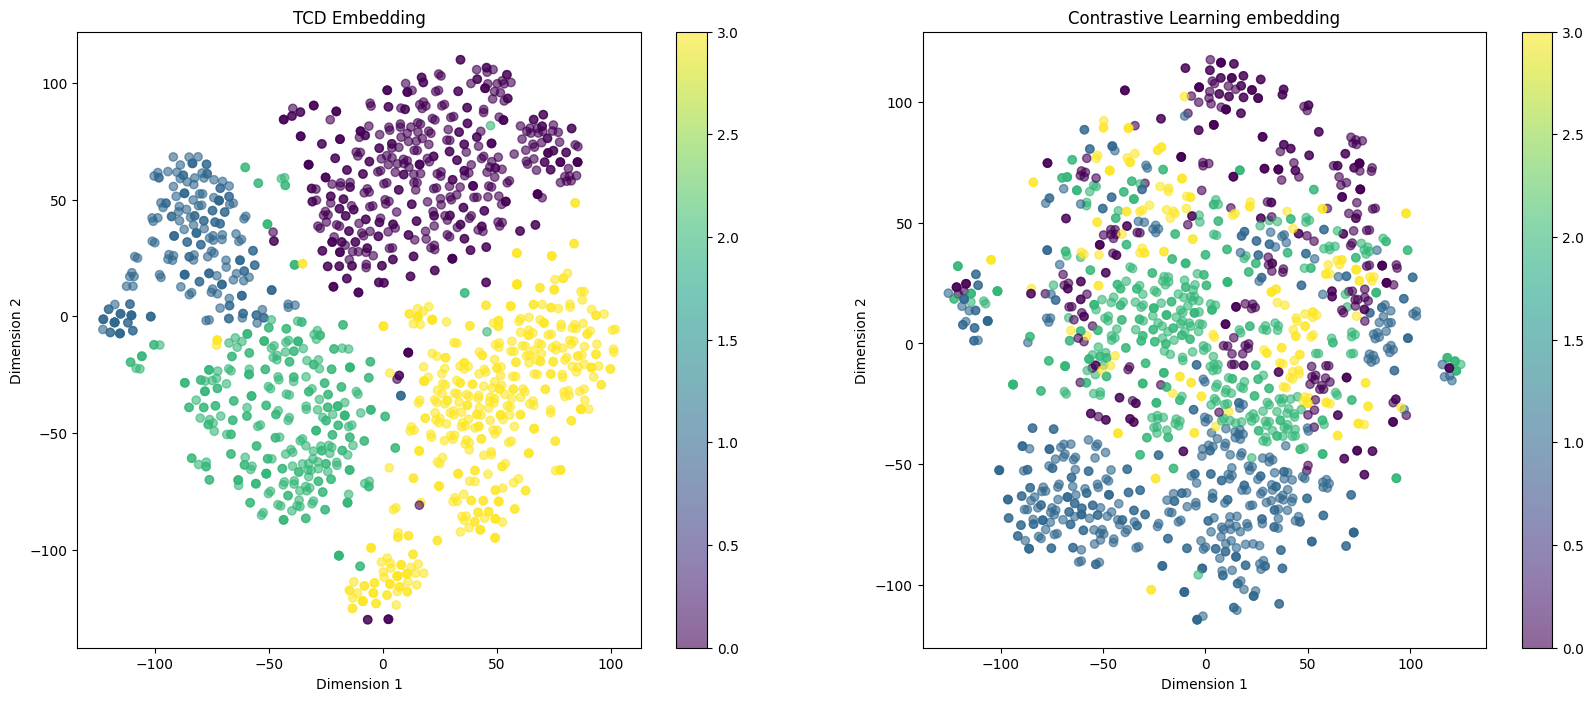

In [1]:
import numpy as np
import torch
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def load_data_and_plot_tsne(embedding_path, label_path, ax, title):
    # 读取embedding和label文件
    embeddings = torch.load(embedding_path, map_location=torch.device('cpu'))
    labels = np.load(label_path)

    # 检查数据形状
    print(f'{title} - Embeddings shape: {embeddings.shape}')
    print(f'{title} - Labels shape: {labels.shape}')

    # 使用t-SNE进行降维
    tsne = TSNE(n_components=2, random_state=42)
    embeddings_2d = tsne.fit_transform(embeddings)

    # 绘制二维嵌入降维图
    scatter = ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='viridis', alpha=0.6)
    ax.set_title(title)
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
    return scatter

# 创建图形和子图
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# 绘制当前文件夹下的数据
scatter1 = load_data_and_plot_tsne('tcd_embedding.pt', 'tcd_labels.npy', axs[0], 'TCD Embedding')

# 绘制../data/文件夹下的数据
scatter2 = load_data_and_plot_tsne('cl_embedding.pt', 'cl_labels.npy', axs[1], 'Contrastive Learning embedding')

plt.savefig('./vis.pdf')

# 添加颜色条
fig.colorbar(scatter1, ax=axs[0])
fig.colorbar(scatter2, ax=axs[1])

plt.show()